In [16]:
#Load the csv from the /datawarehouse folder:
data <- read.csv("/Users/gerardoguerrero/vis/Project/datawarehouse/PIB_entidad_federativa_2003-2022.csv",header = TRUE)
data

Concepto,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,...,X2013,X2014,X2015,X2016,X2017,X2018,X2019.R,X2020.R,X2021.R,X2022.P
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estados Unidos Mexicanos,17899317.9,18537507.5,18929250.9,19838803.9,20251027.3,20442061.7,19155182.7,20107450.9,20799960.6,...,21722561.4,22266443.0,22868154.2,23273490.8,23709107.3,24176670.4,24115905.7,22036016.0,23300708.9,24220853.9
Aguascalientes,176576.7,182404.6,185650.5,200318.3,219091.9,218472.9,201960.4,219912.9,230510.4,...,251657.0,277675.3,294497.2,307395.8,314242.4,327926.3,327057.9,303555.9,312953.6,316500.2
Baja California,682996.9,697268.7,716802.2,772686.8,778767.0,756707.3,658790.7,686065.9,698850.5,...,733753.7,760857.0,795080.7,828692.2,863600.6,878816.9,897460.3,833361.0,901663.5,929458.7
Baja California Sur,102696.4,110723.4,117708.5,126685.4,137545.3,142084.1,134464.7,138668.8,144956.4,...,145215.7,147613.7,156072.0,163094.6,170784.4,184618.1,179624.2,152596.9,170695.0,177420.7
Campeche,986877.7,998062.3,985831.3,959641.1,897799.9,828677.2,753908.8,730232.3,711663.2,...,692549.9,685992.0,700310.7,663239.2,595667.0,564591.1,544913.5,502567.2,491693.6,473101.0
Coahuila de Zaragoza,725622.4,738323.0,751258.3,798549.1,819995.3,806977.1,647795.1,775118.7,824838.5,...,864429.4,902863.2,897702.1,901719.5,941581.8,966054.7,974553.8,862347.2,916340.0,922287.4
Colima,106240.5,107179.1,107631.3,114843.8,122046.0,124498.0,118472.2,125595.9,133676.2,...,133729.3,135090.7,141029.1,140705.2,150360.1,153808.4,161220.9,148214.3,147102.4,148129.8
Chiapas,314665.4,304083.4,310293.6,321113.5,324676.5,337160.6,332432.8,355978.9,361270.3,...,360621.0,374691.5,364001.3,369919.3,359734.4,353600.1,349375.4,334056.8,349530.5,368788.6
Chihuahua,559444.8,577532.8,592161.2,635597.8,664331.1,696713.3,626309.6,647629.9,662042.8,...,732550.6,753194.8,803883.3,830488.5,851284.3,853322.8,862011.9,809562.1,849224.2,919617.1


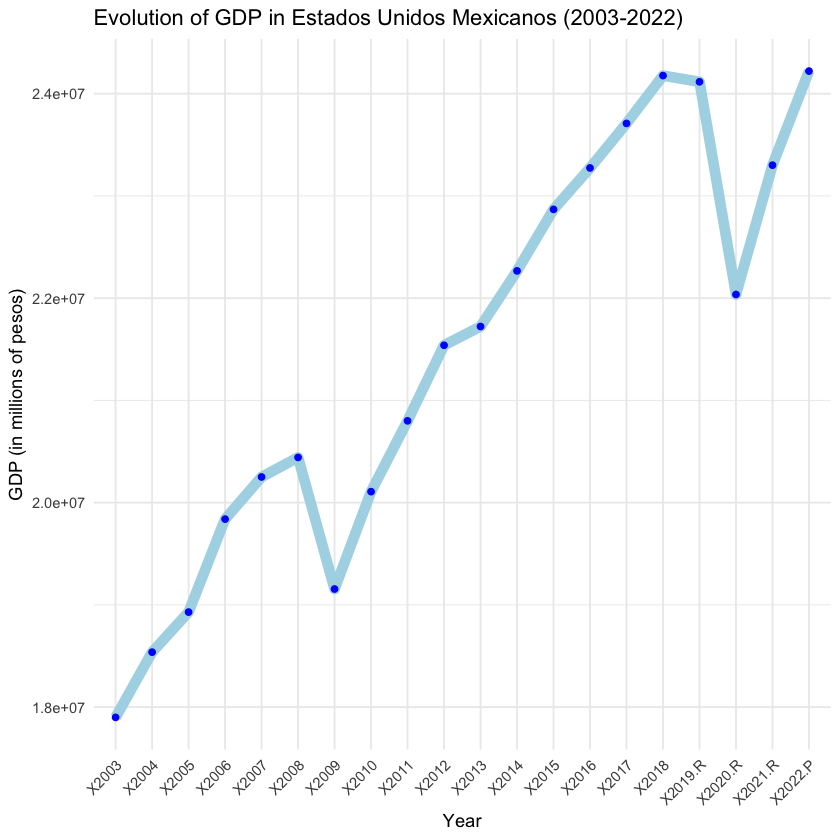

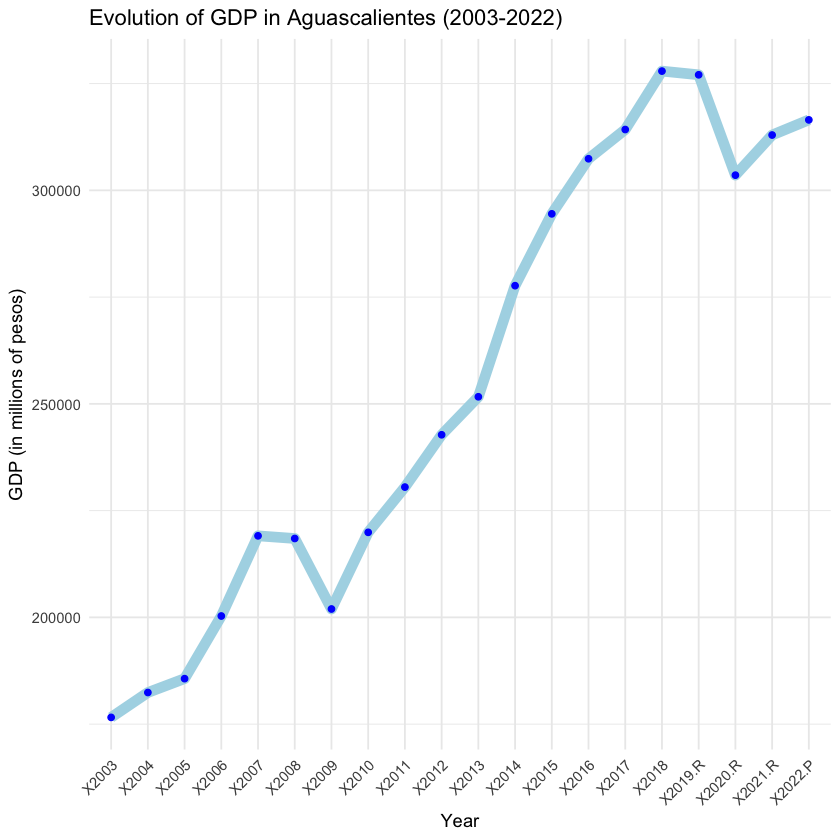

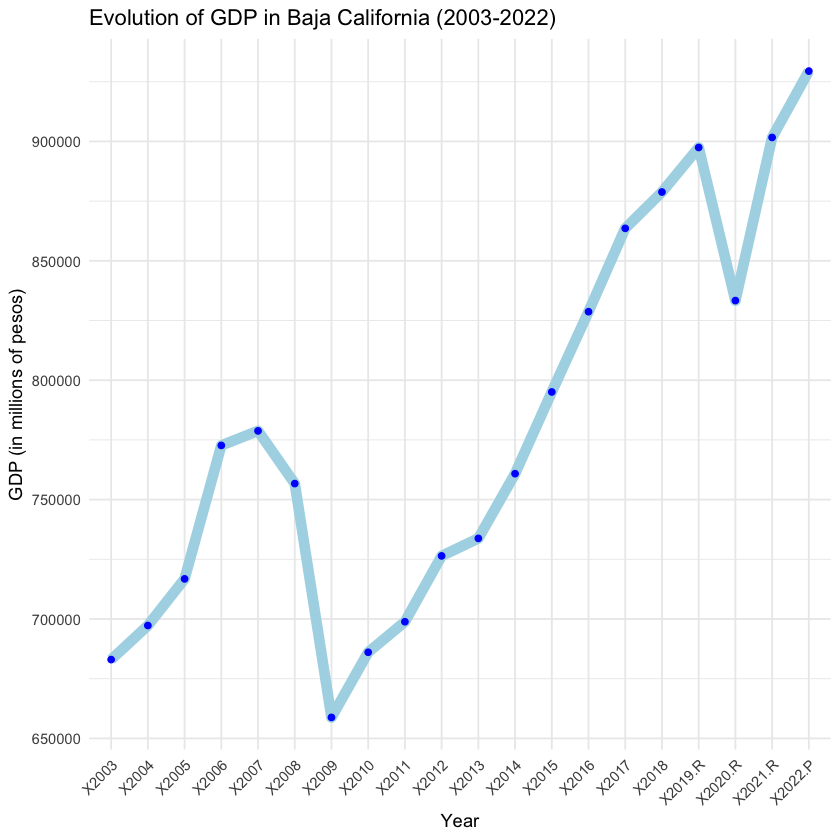

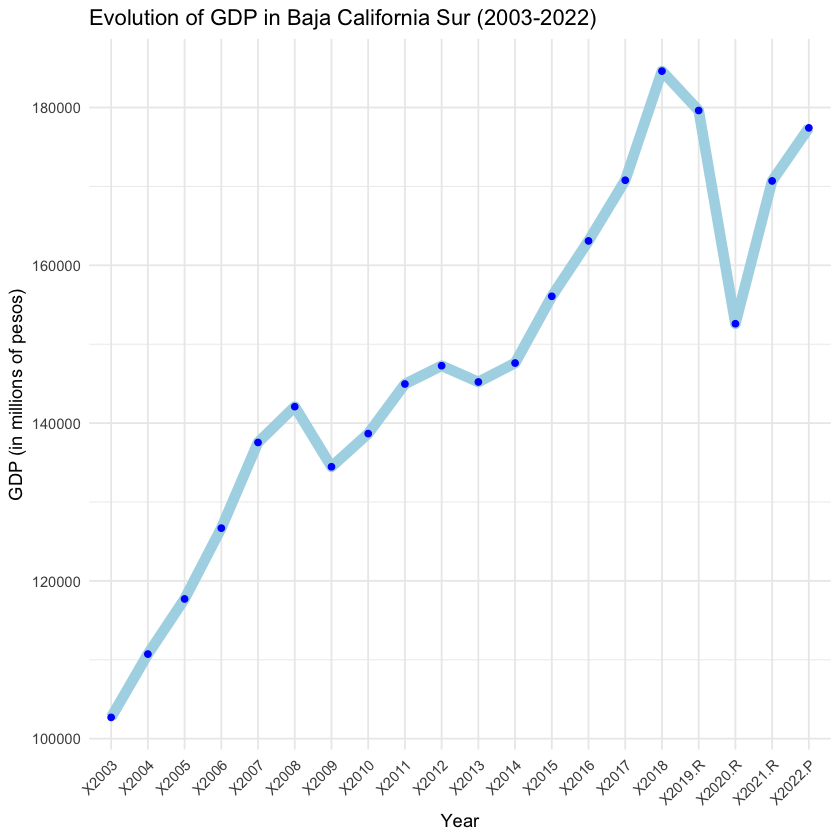

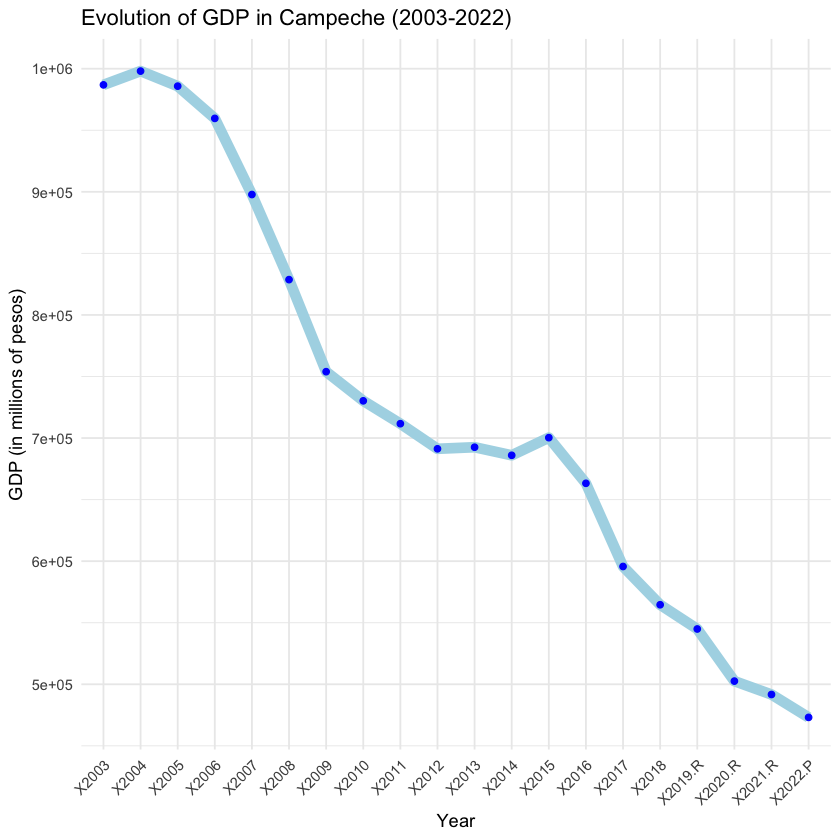

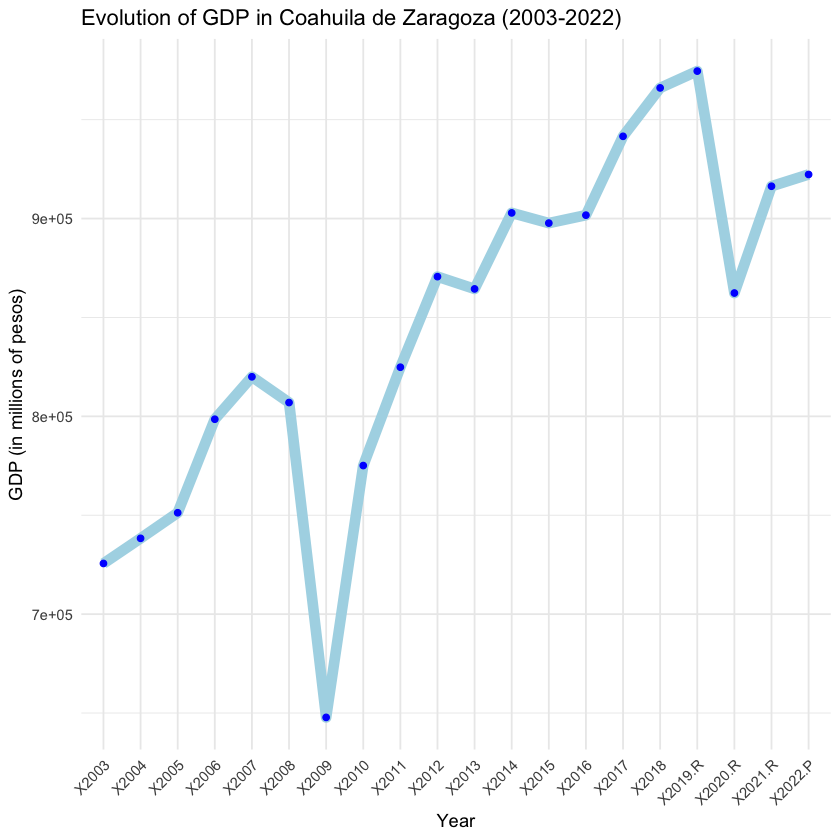

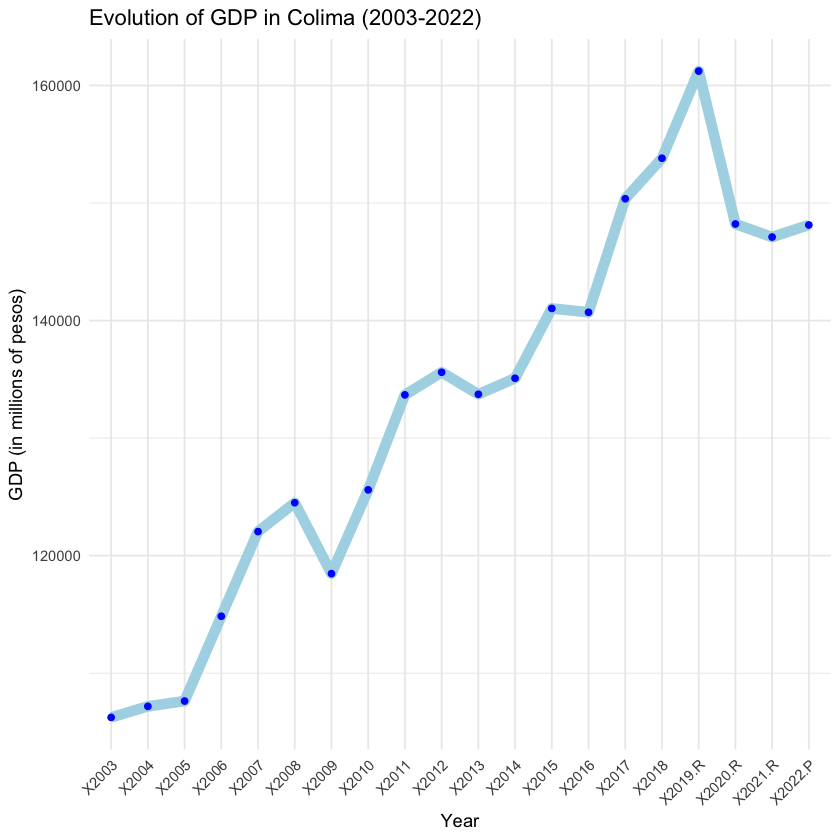

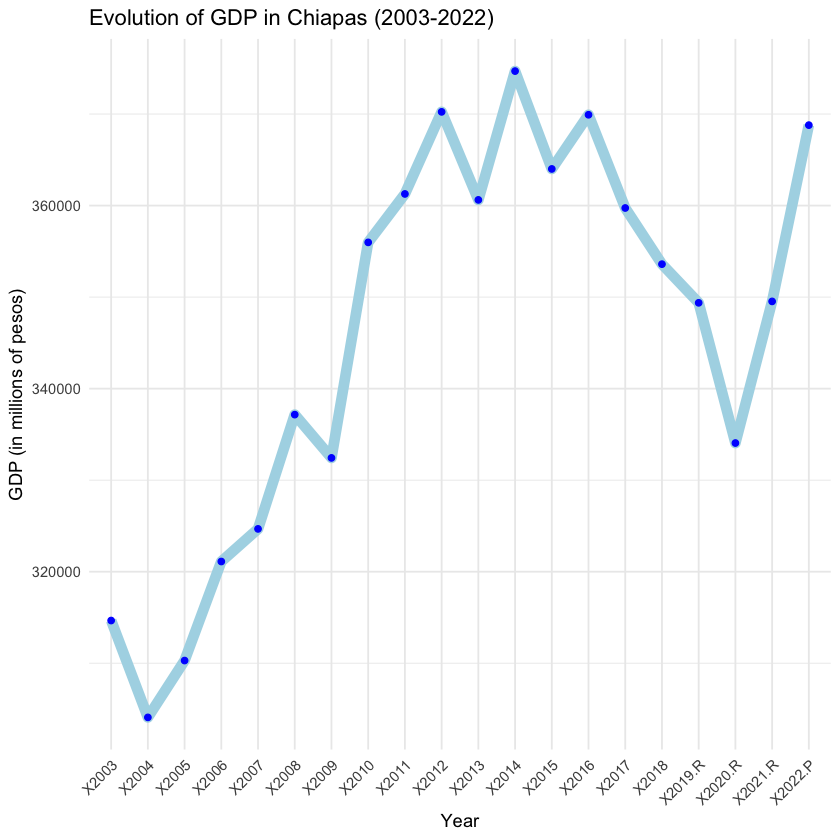

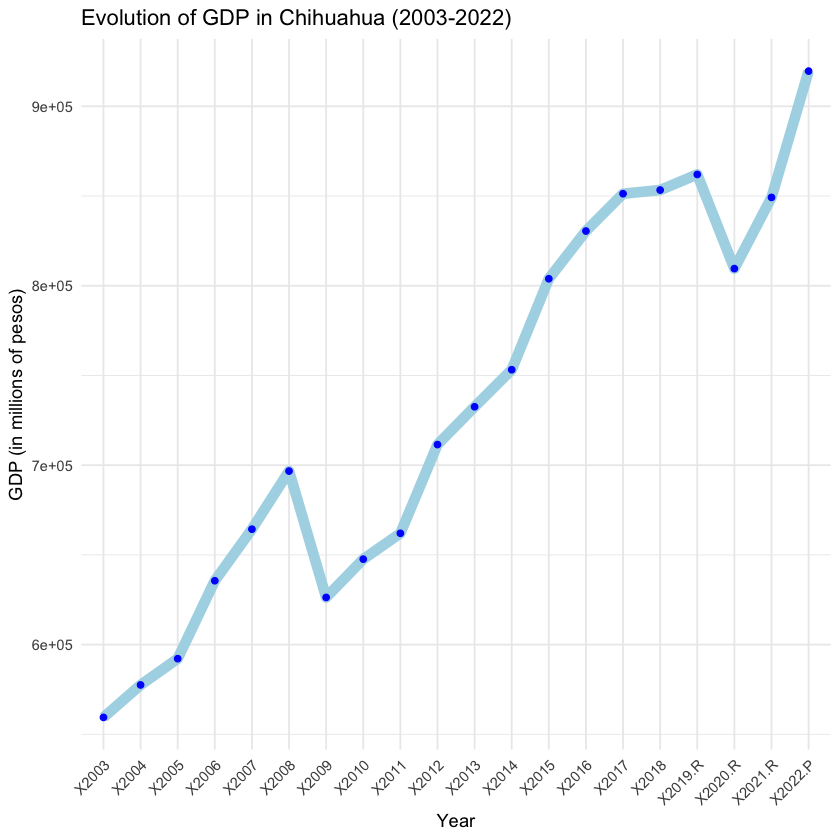

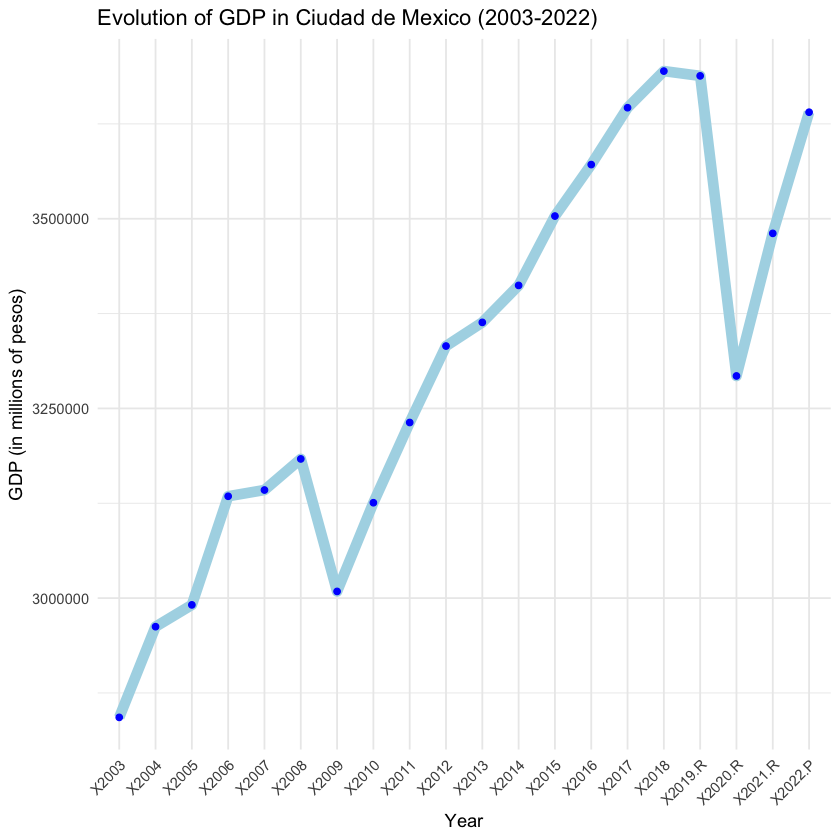

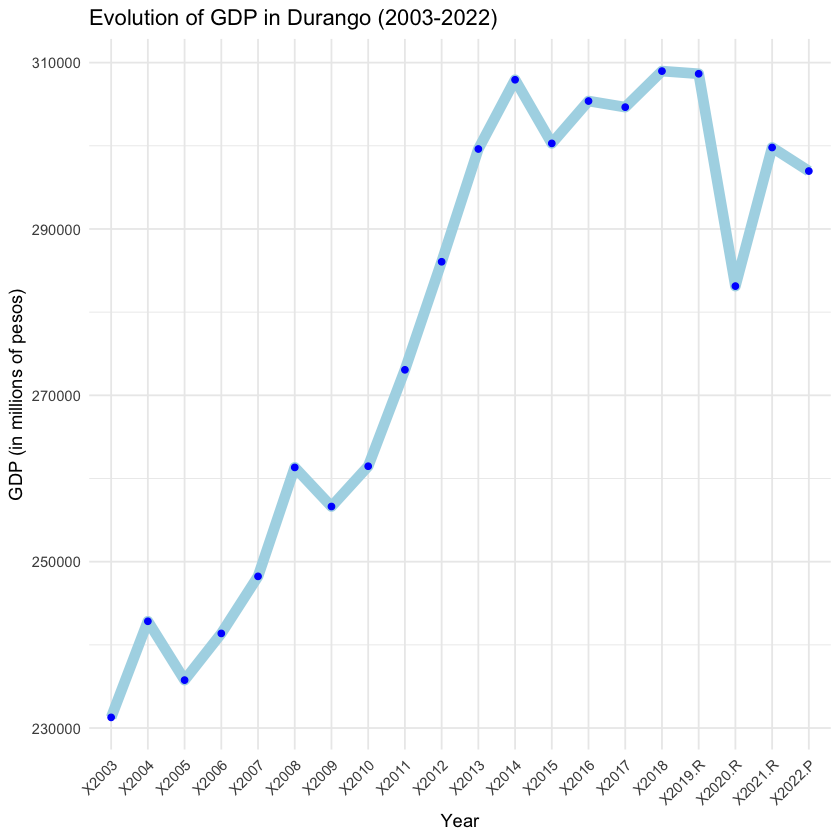

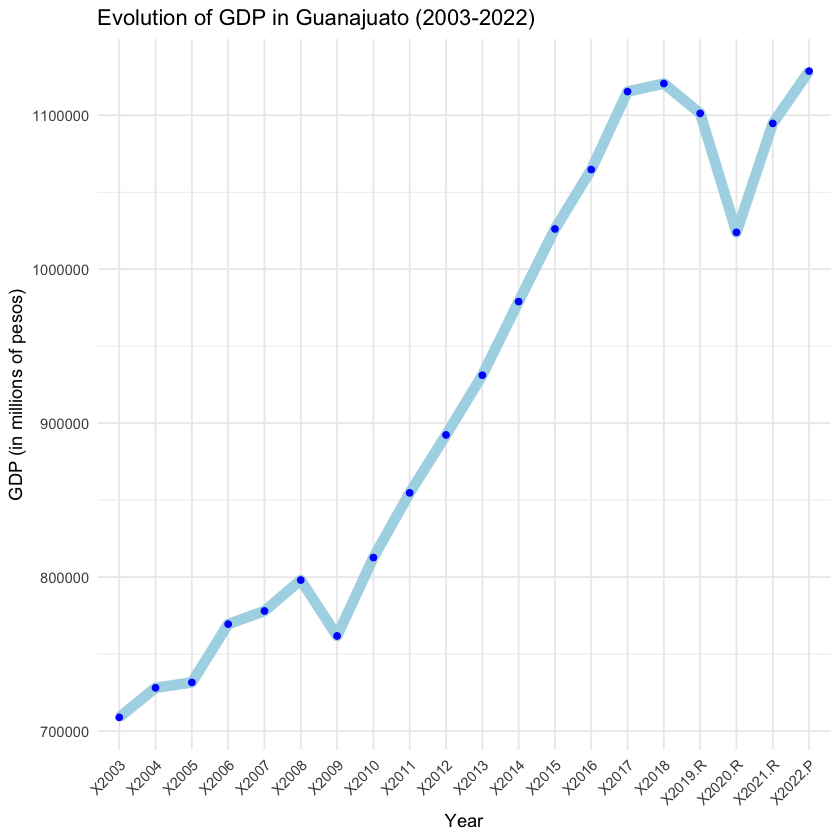

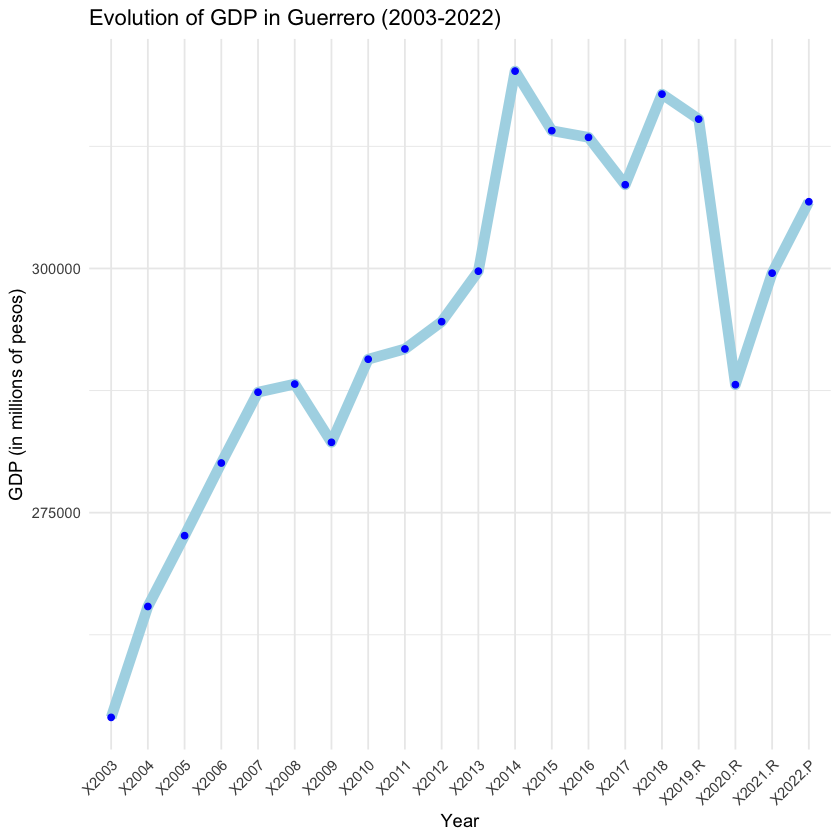

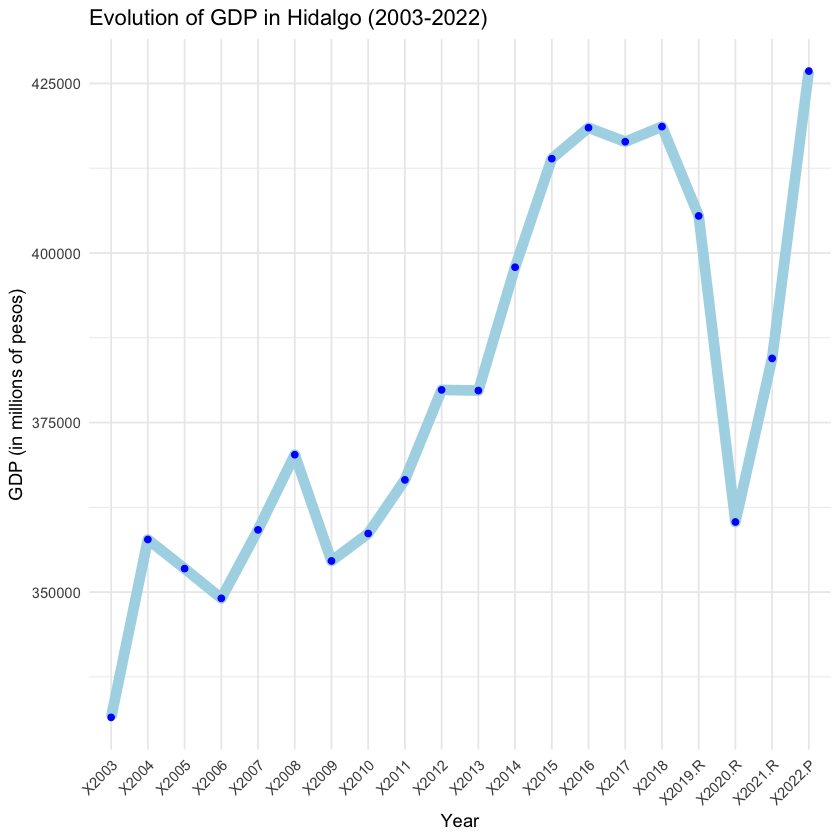

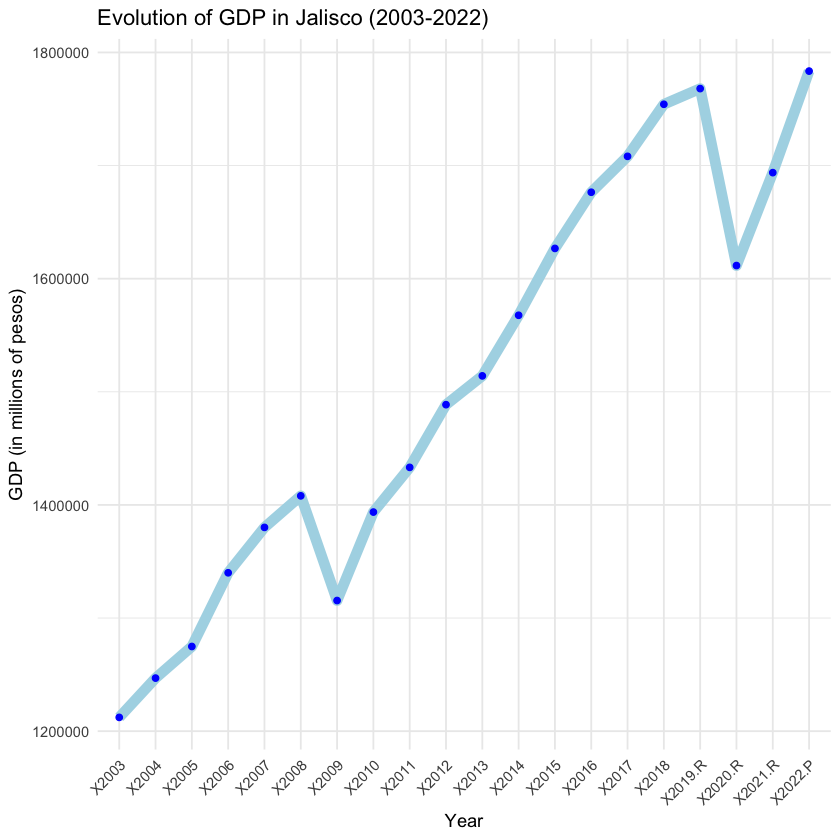

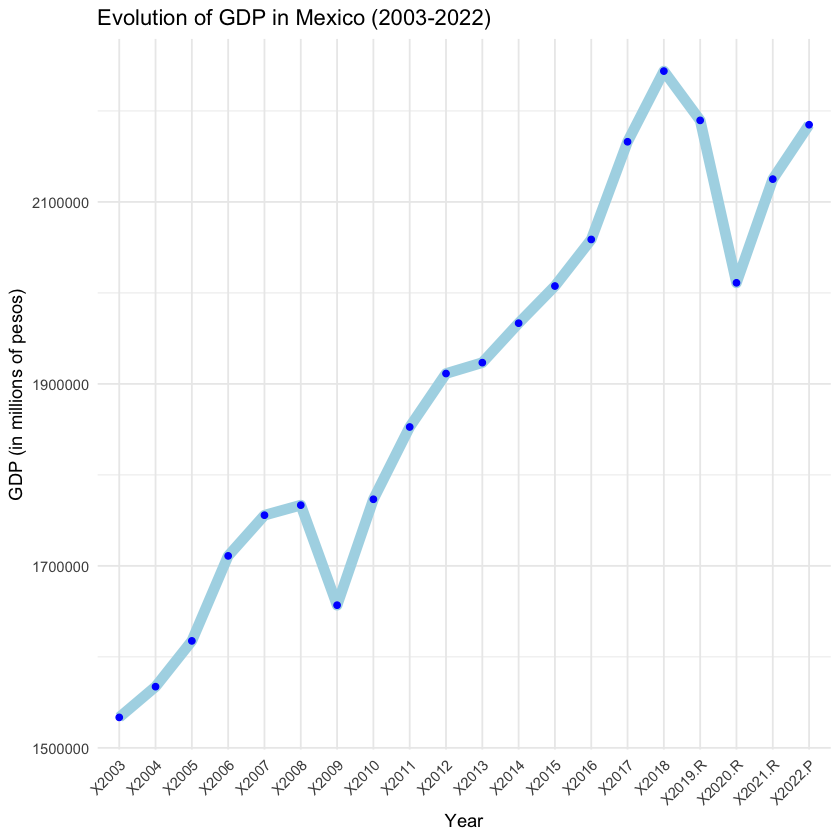

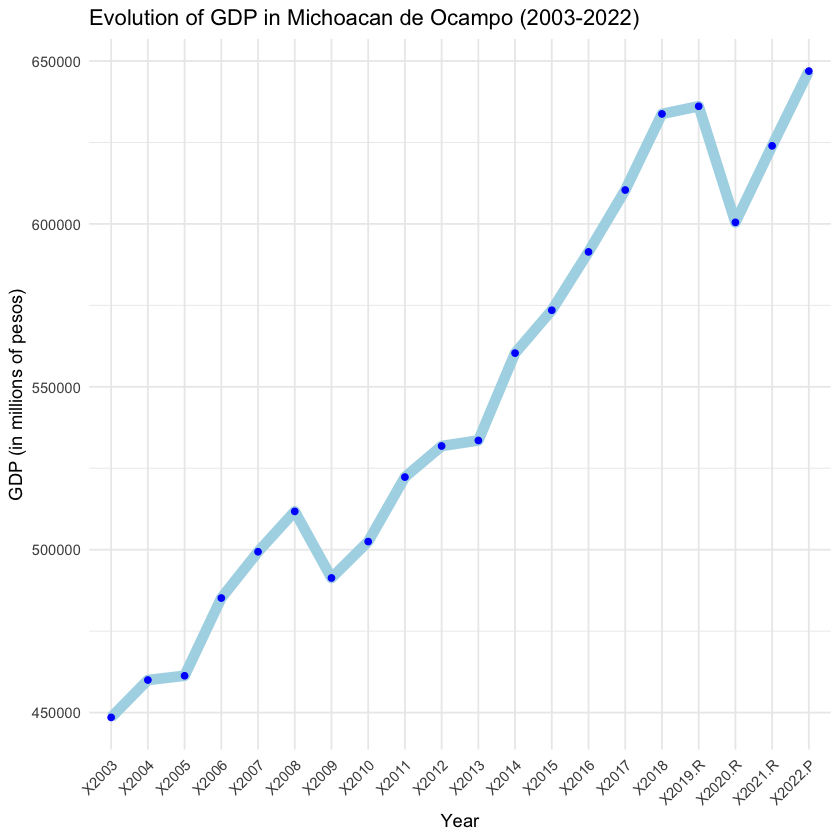

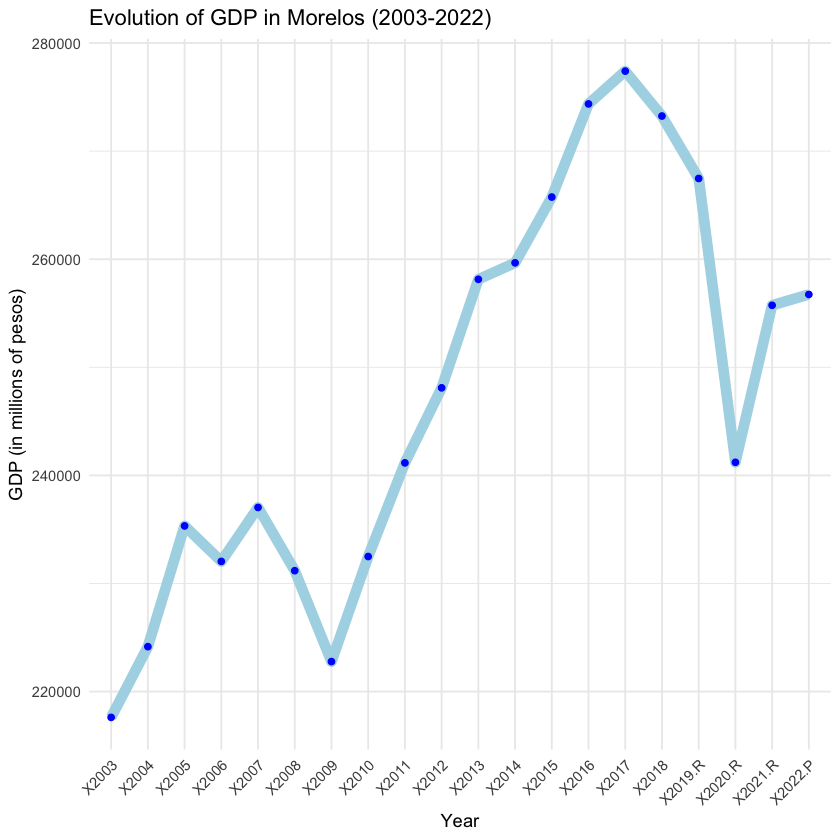

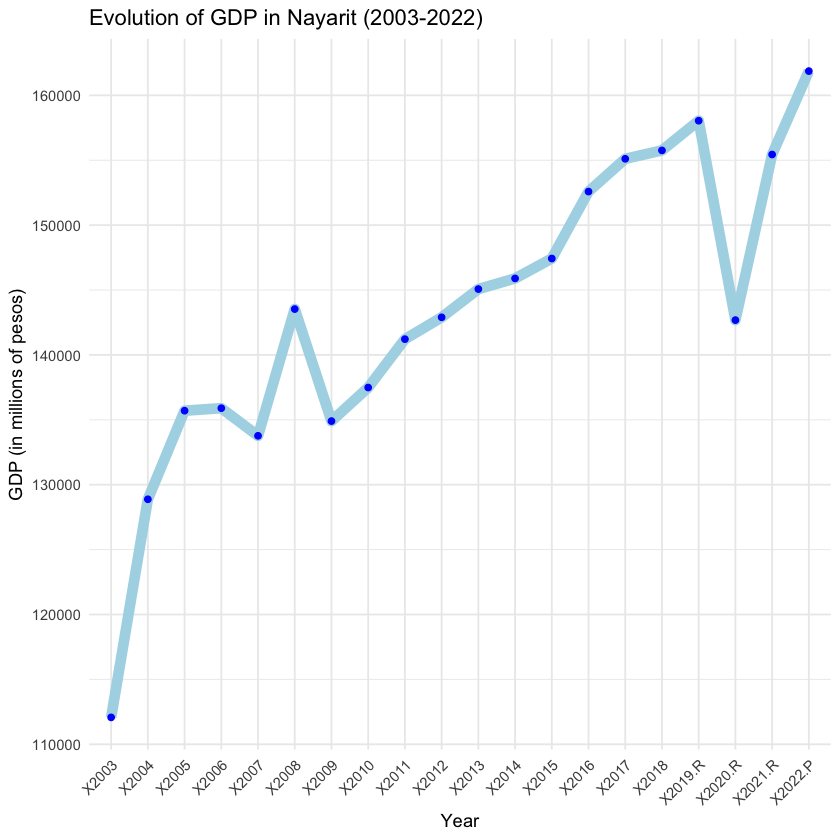

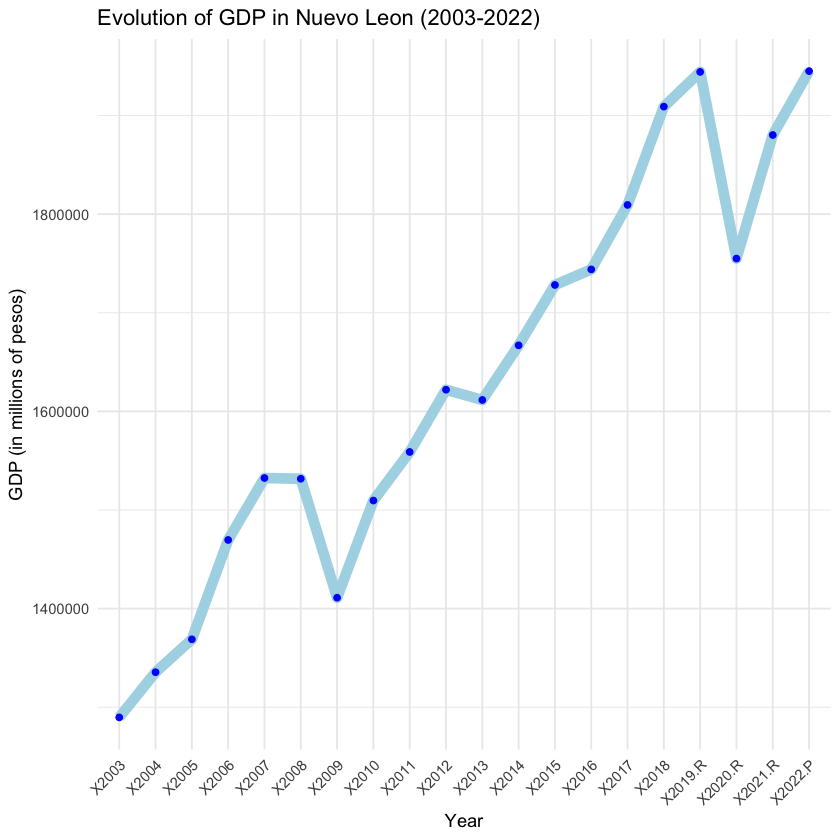

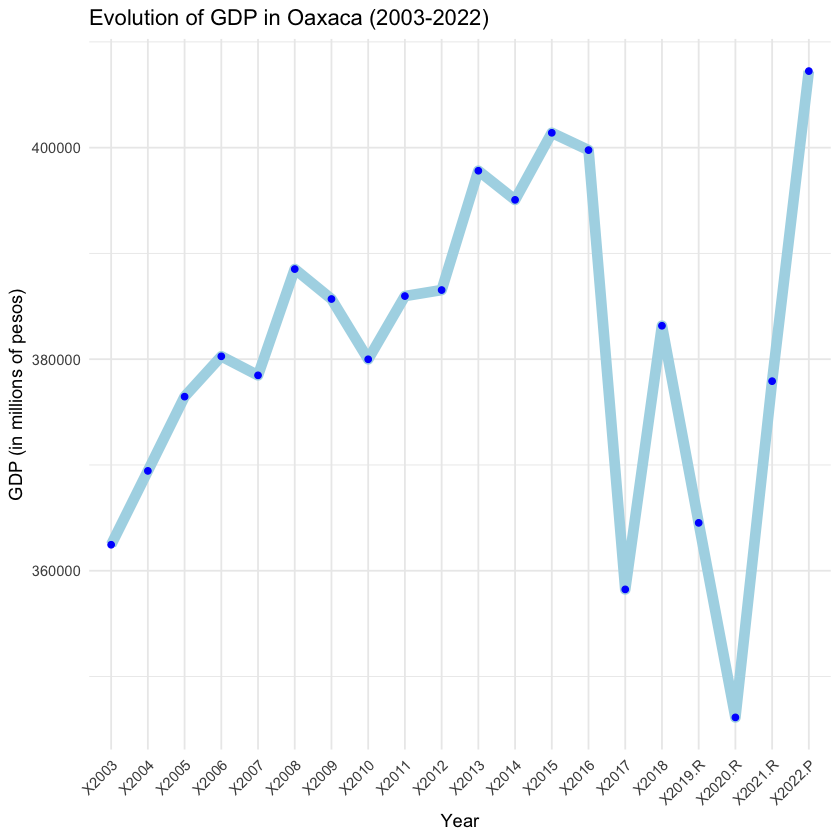

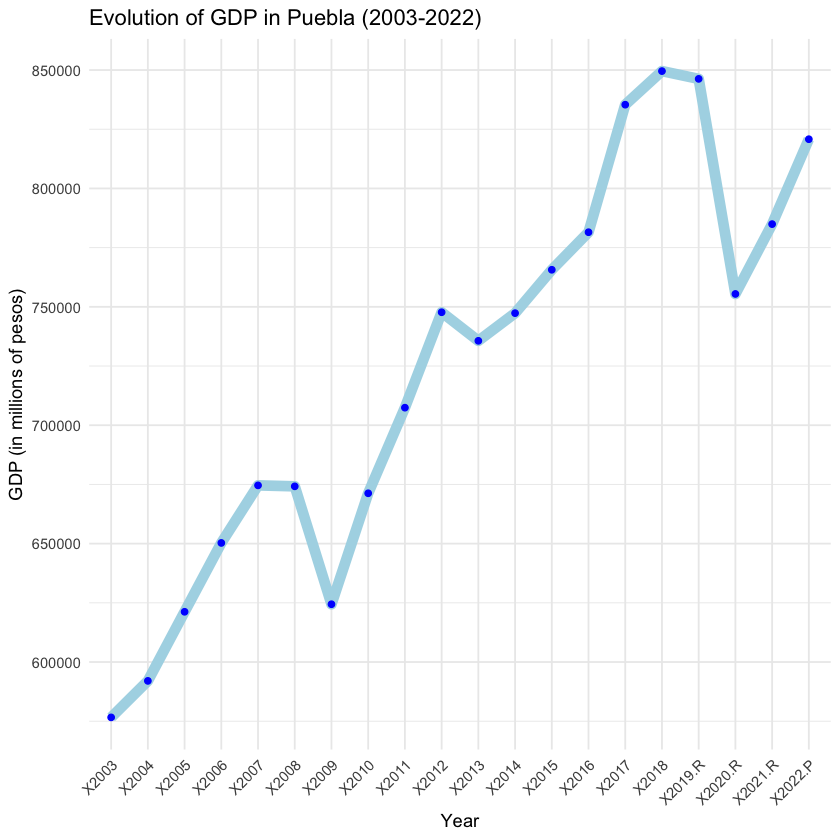

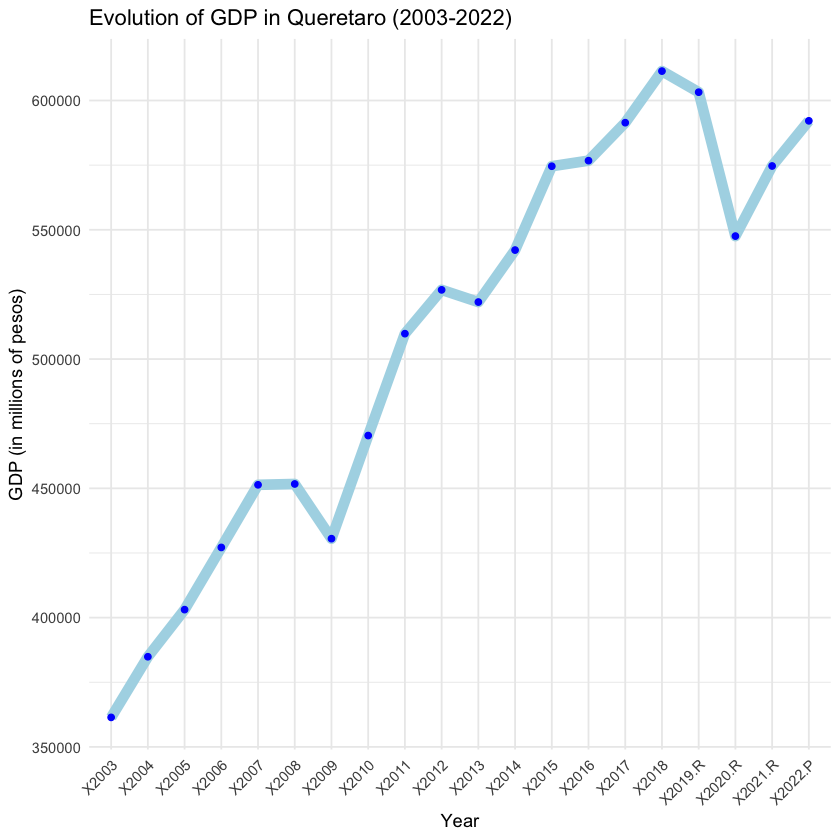

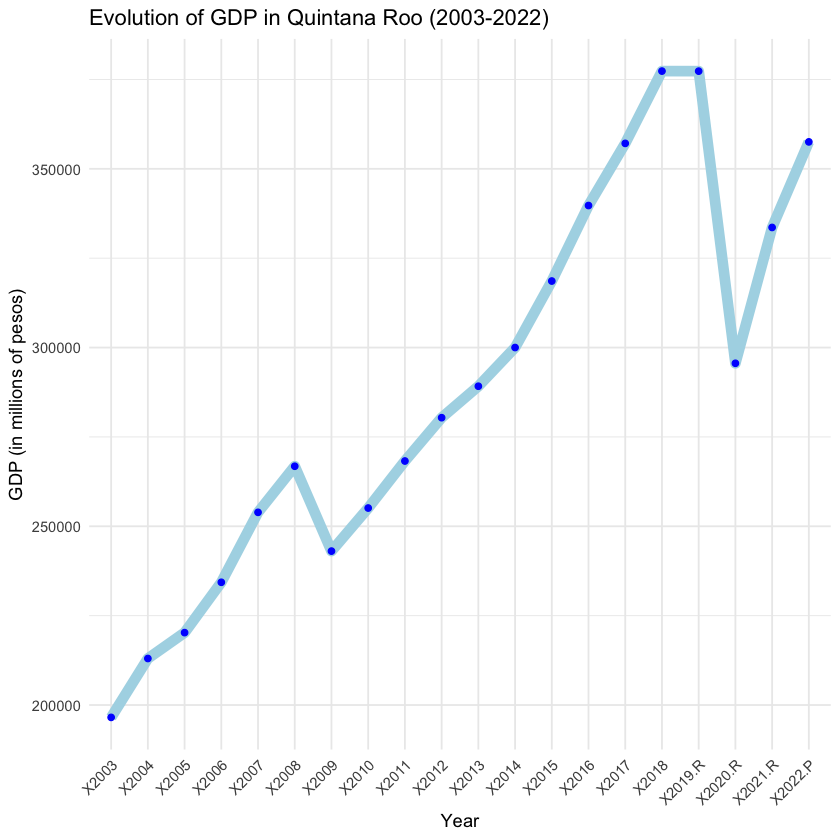

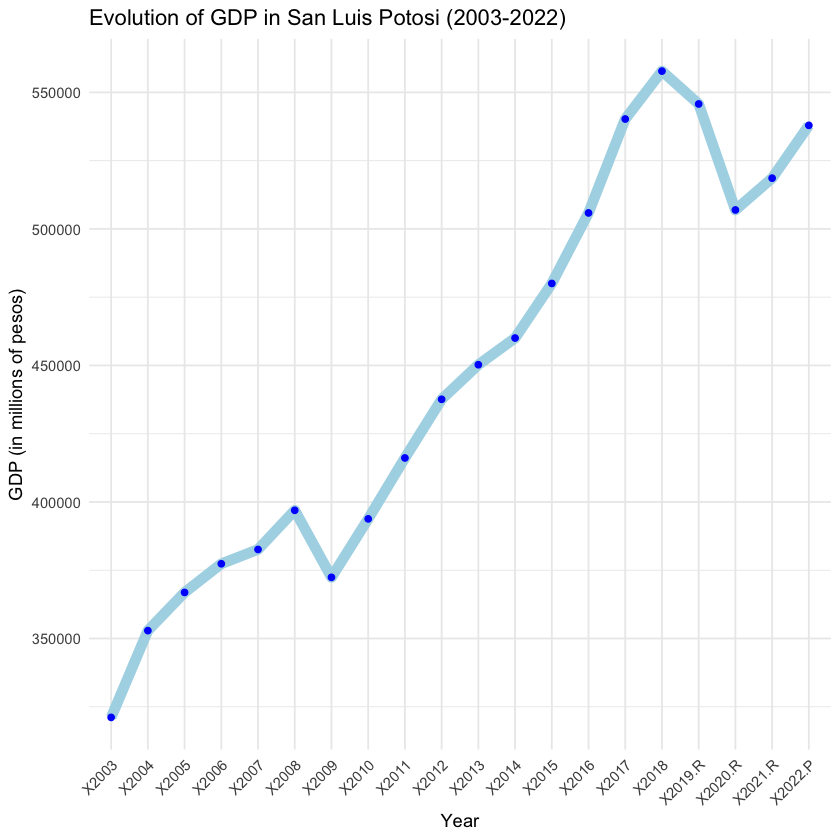

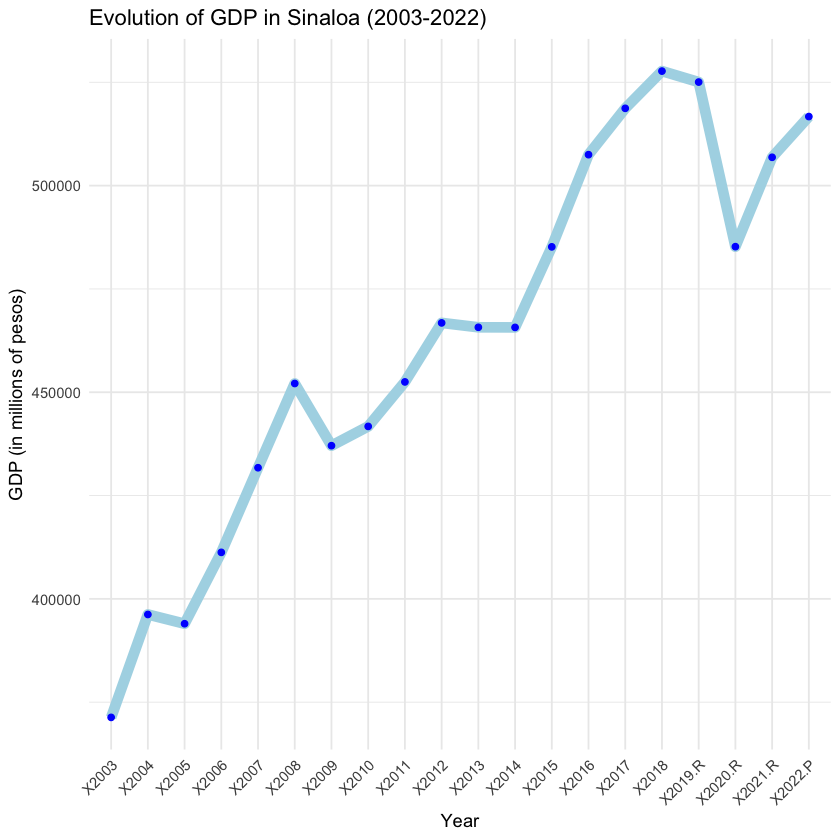

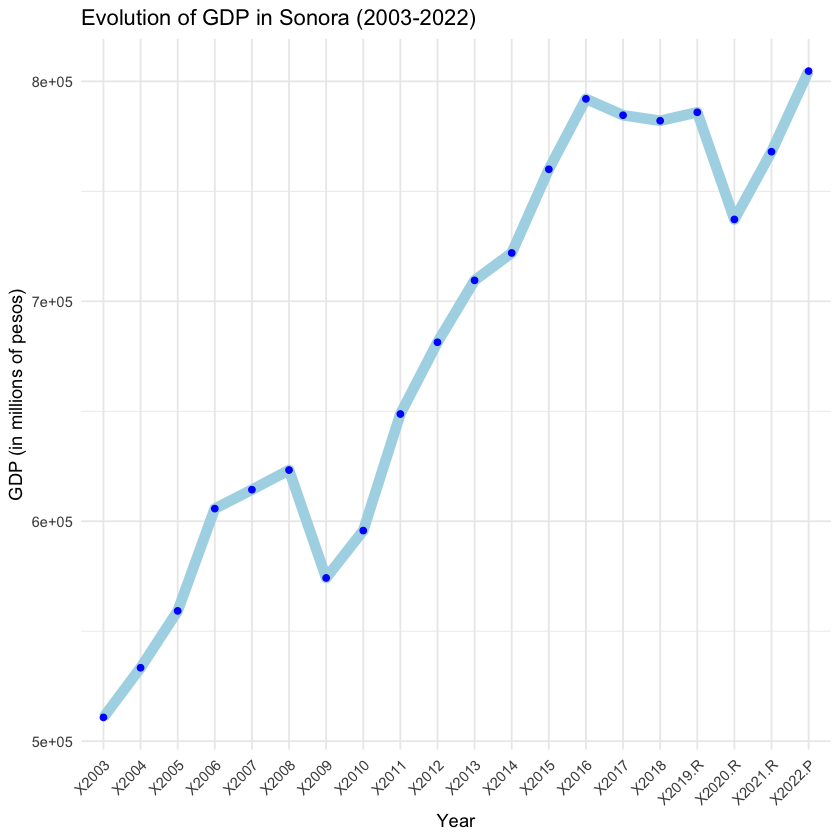

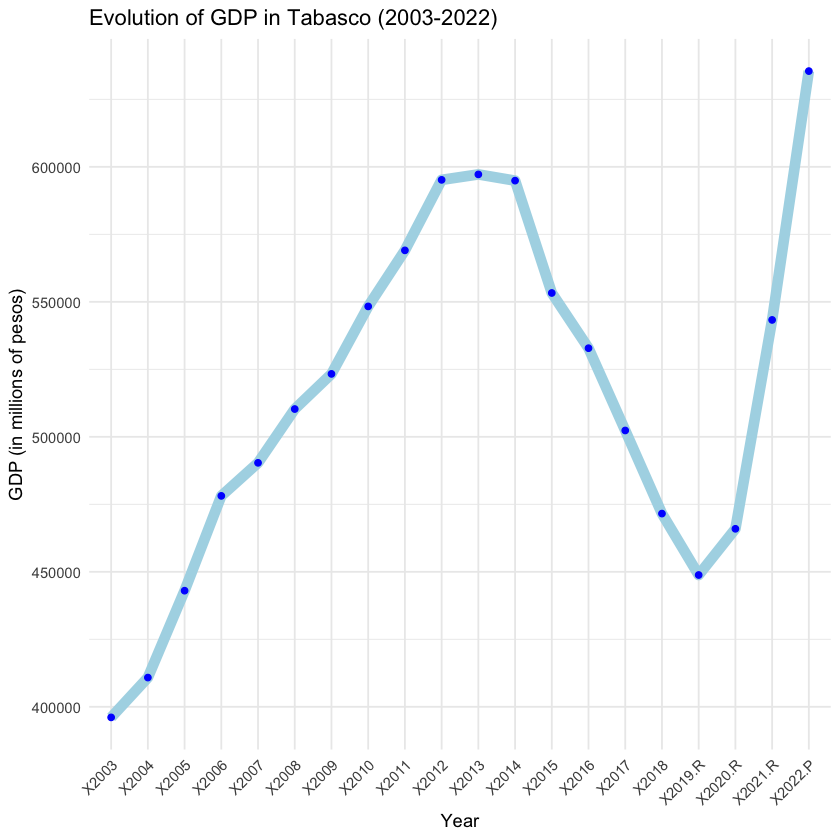

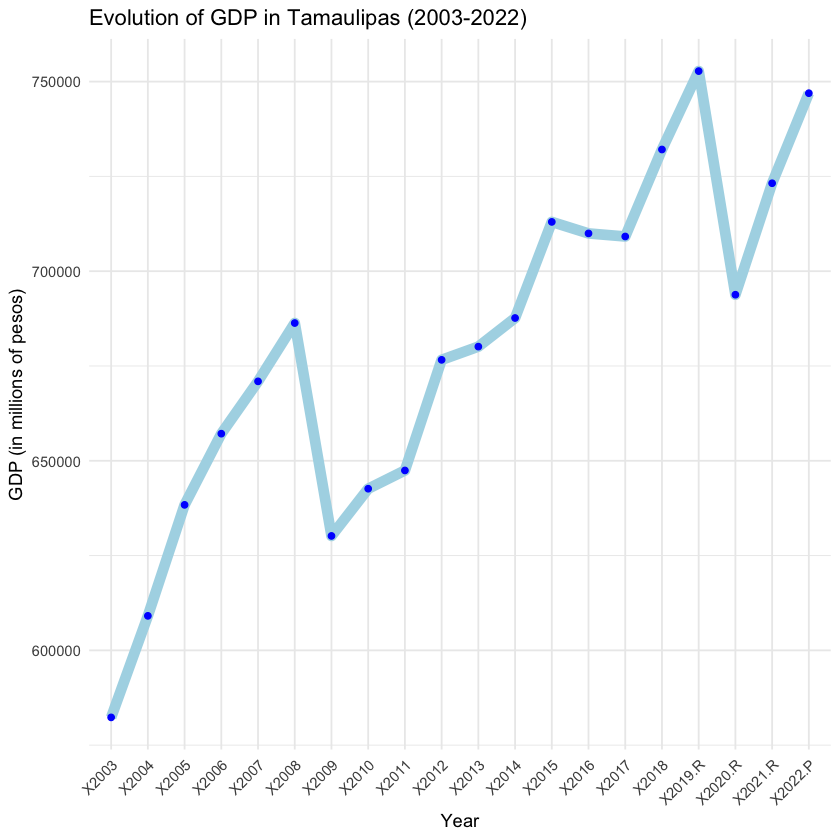

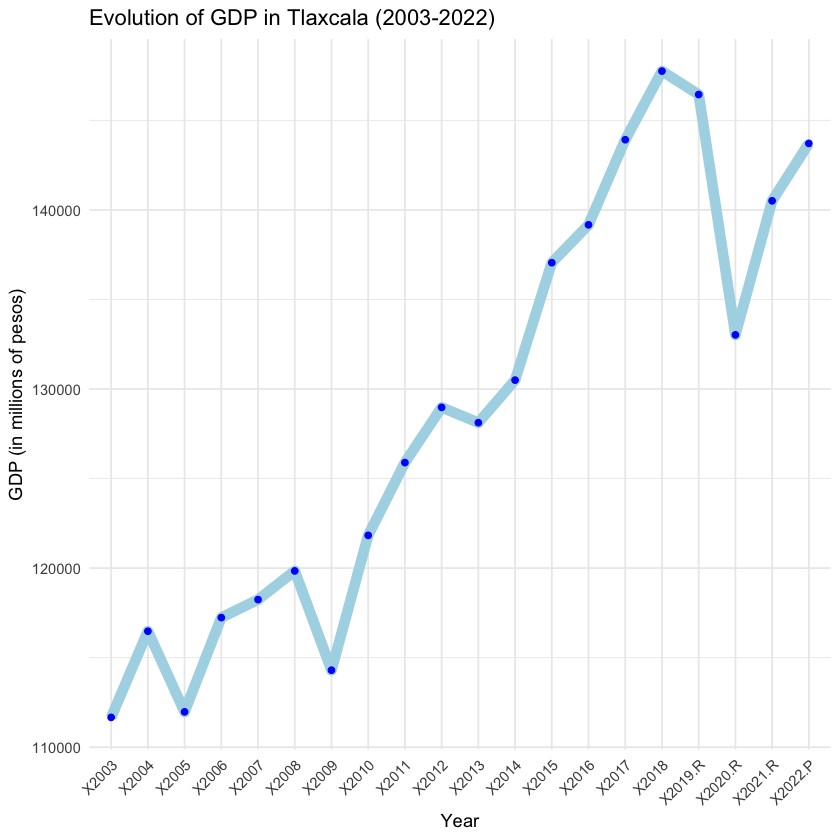

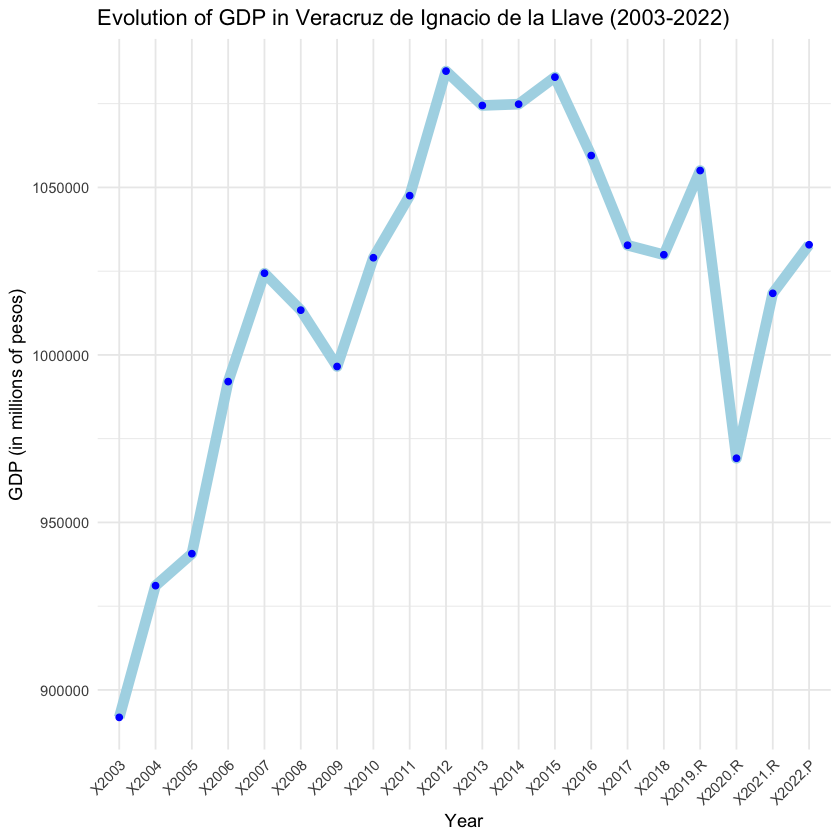

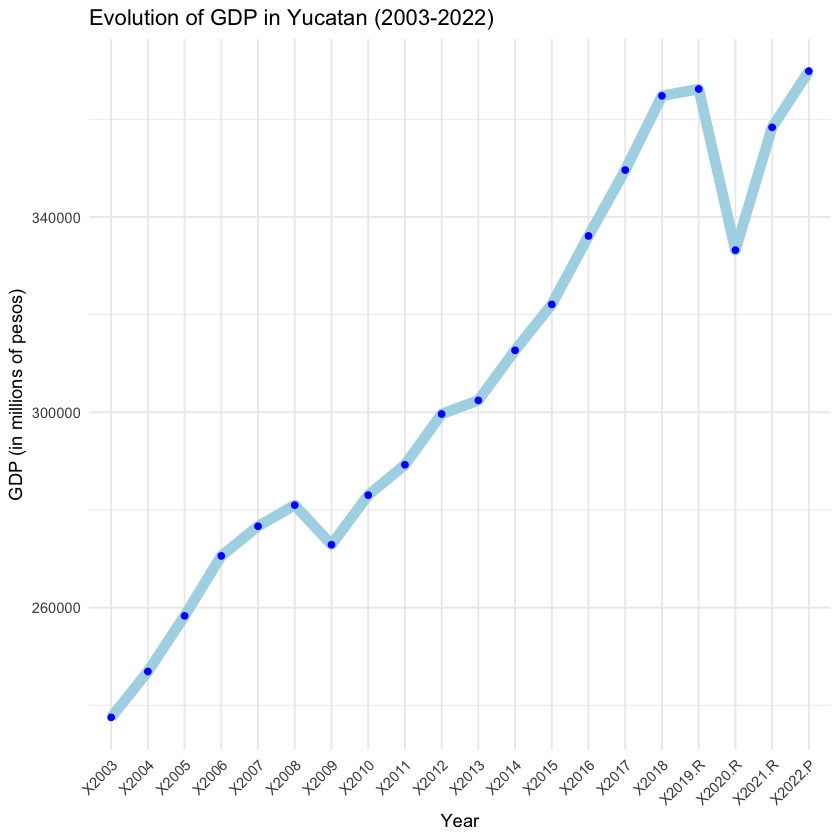

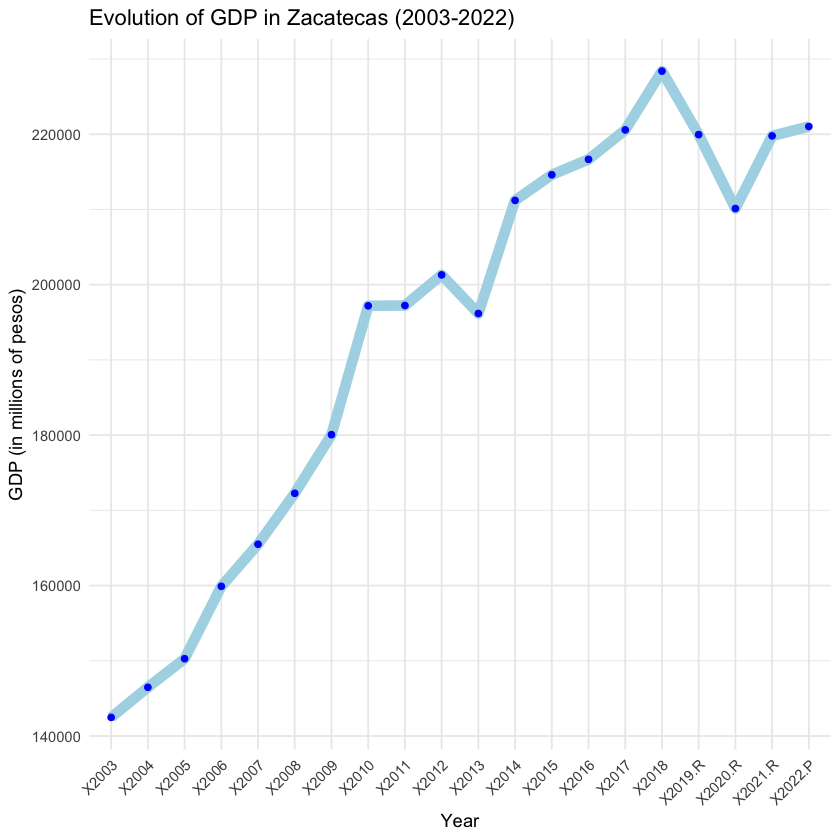

In [29]:

# Define the years (cleaning them from "R" and "P" as before)
years <- colnames(data)[-1]
years_clean <- gsub(" R", "", years)
years_clean <- gsub(" P", "", years_clean)
years_factor <- factor(years_clean, levels = years_clean)


# Loop through each state
for (i in 1:nrow(data)) {  # Start from 2 to skip the national level
  state_name <- as.character(data[i, 1])
  gdp_values <- as.numeric(data[i, -1])
  
  # Prepare the data for plotting
  plot_data <- data.frame(Year = years_factor, GDP = gdp_values)
  
  # Generate the plot
  p <- ggplot(plot_data, aes(x = Year, y = GDP, group = 1)) +
    geom_line(color = "lightblue", size = 3) +  # Draw the line
    geom_point(color = "blue") +  # Add points
    theme_minimal() +  # Use a minimal theme
    labs(title = paste("Evolution of GDP in", state_name, "(2003-2022)"),
         x = "Year", y = "GDP (in millions of pesos)") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels
    print(p)
}
